In [1]:
import warnings

# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

## 실습에 주로 활용할 데이터 셋

[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

`sklearn.dataset`에서 제공해주는 다양한 샘플 데이터를 활용합니다.

### iris 데이터셋

꽃 종류 분류하기

[iris 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [3]:
from sklearn.datasets import load_iris

In [4]:
# iris 데이터셋을 로드합니다.
iris = load_iris() # 코드입력

* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
feature_names = iris['feature_names']# 코드입력
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [8]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [10]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [11]:
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [12]:
df_iris['target'] =  target # 코드입력

In [13]:
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

### 시각화

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

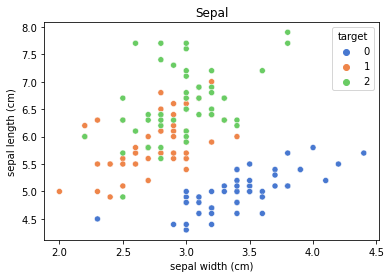

In [15]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris) # 코드입력
plt.title('Sepal')
plt.show()

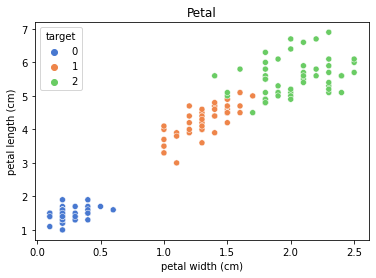

In [16]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris) # 코드입력
plt.title('Petal')
plt.show()

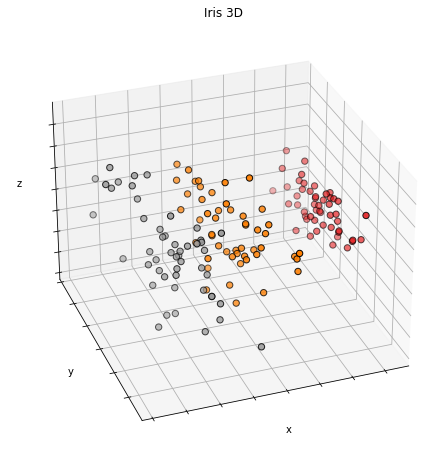

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], stratify=df_iris['target']) # 코드입력

In [20]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [21]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

<AxesSubplot:xlabel='target', ylabel='count'>

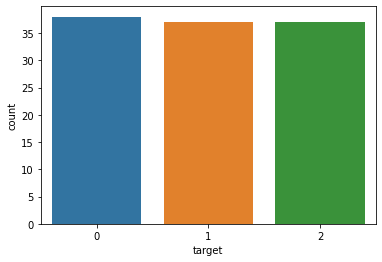

In [22]:
sns.countplot(y_train)

stratify: label의 클래스의 분포를 균등하게 배분

In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], stratify=df_iris['target'])  # 코드입력

<AxesSubplot:xlabel='target', ylabel='count'>

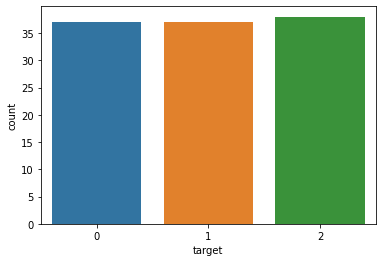

In [24]:
sns.countplot(y_train)

In [25]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [26]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

### Logistic Regression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

**one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별

**one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

대부분 **OvsR 전략을 선호**합니다.

In [27]:
from sklearn.linear_model import LogisticRegression

**step 1: 모델 선언**

In [28]:
model = LogisticRegression() # 코드입력

**step 2: 모델 학습**

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

**step 3: 예측**

In [30]:
prediction = model.predict(x_valid) # 코드입력

In [31]:
prediction[:5]

array([0, 2, 1, 1, 2])

**step 4: 평가**

In [32]:
(prediction == y_valid).mean()

0.9473684210526315

### SGDClassifier

**stochastic gradient descent (SGD)**: 확률적 경사 하강법

In [33]:
from IPython.display import Image

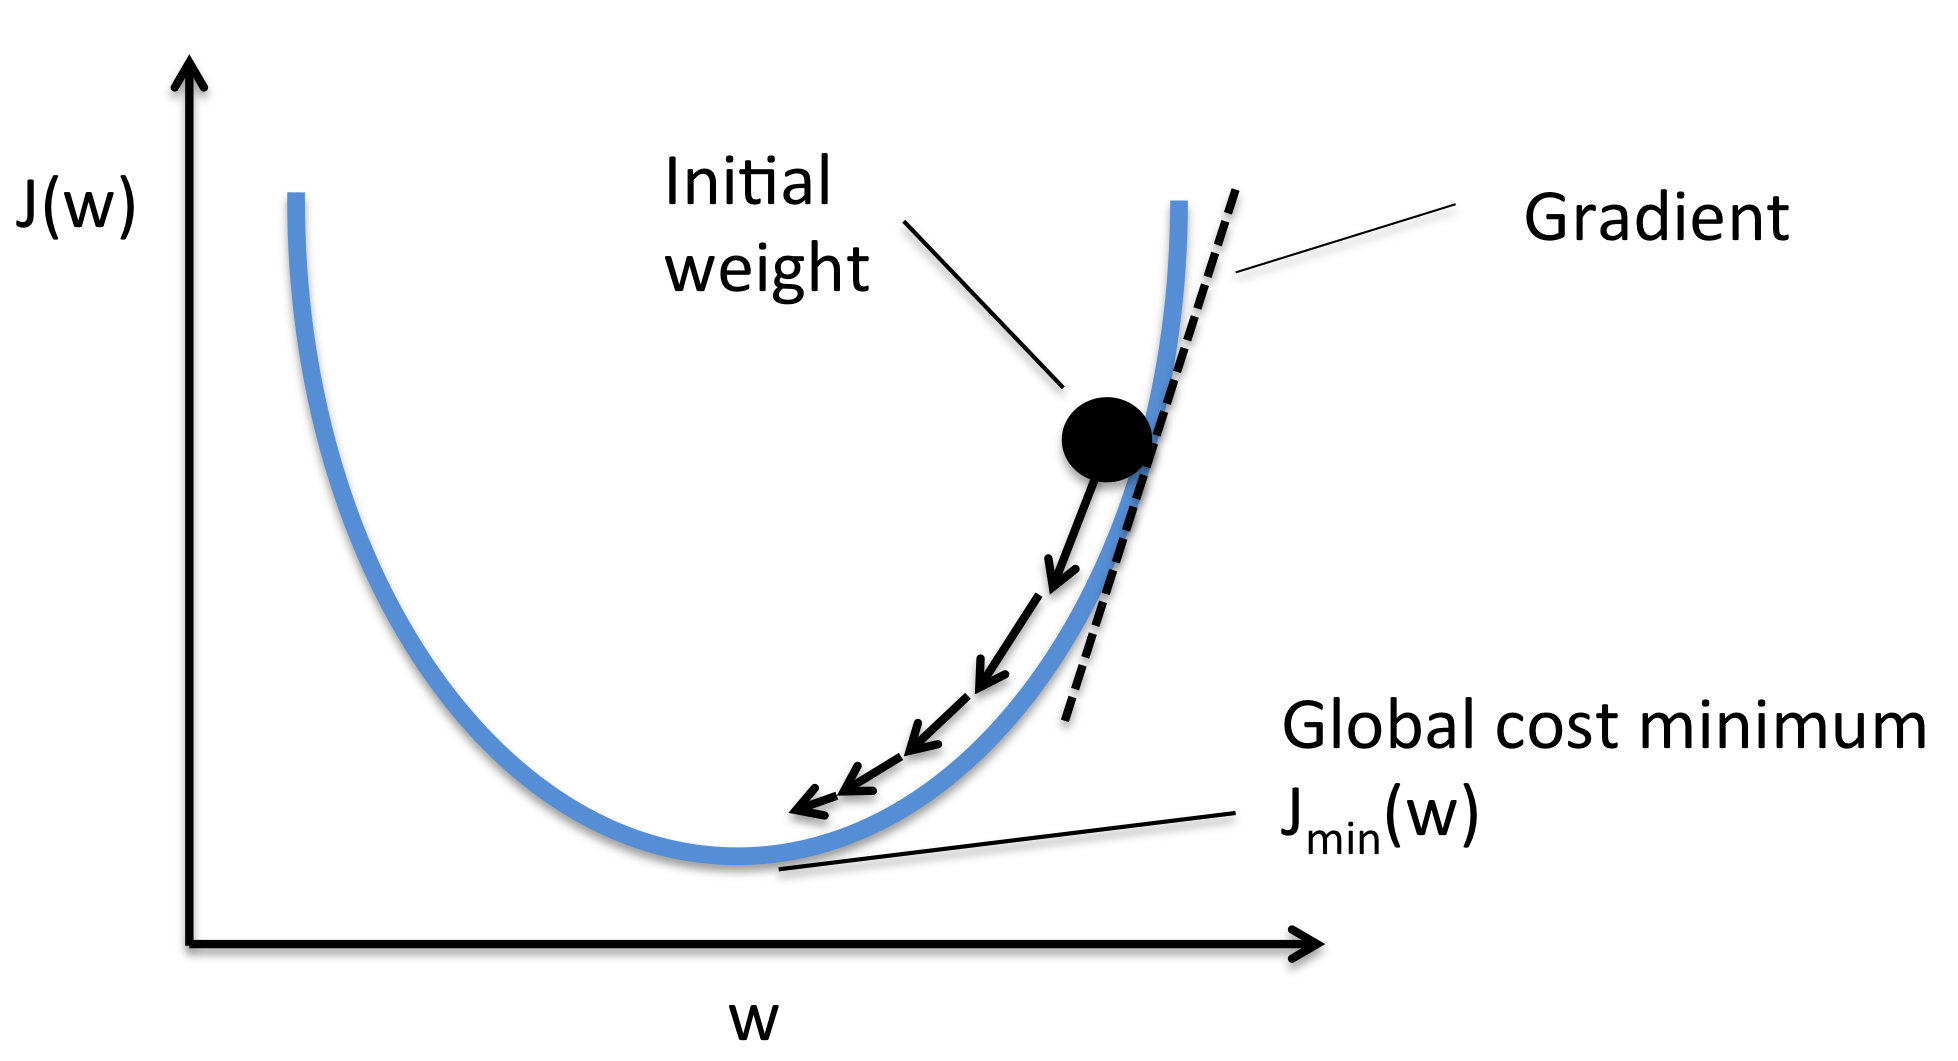

In [34]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

[sklearn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [35]:
from sklearn.linear_model import SGDClassifier

**step 1: 모델 선언**

In [36]:
sgd = SGDClassifier() # 코드입력

**step 2: 모델 학습**

In [37]:
sgd.fit(x_train, y_train)

SGDClassifier()

**step 3: 예측**

In [38]:
prediction = sgd.predict(x_valid) # 코드입력

In [39]:
(prediction == y_valid).mean()

0.9210526315789473

### 하이퍼 파라미터 (hyper-parameter) 튜닝

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

각 알고리즘 별, hyper-parameter의 종류가 다양합니다.

모두 다 외워서 할 수는 없습니다! 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증해야합니다.

(나중에는 이 또한 자동으로 할 수 있습니다)

* random_state: 하이퍼 파라미터 튜닝시, 고정할 것
* n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

In [40]:
sgd = SGDClassifier(penalty='elasticnet', random_state=0, n_jobs=-1) # 코드입력

In [41]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='elasticnet', random_state=0)

In [42]:
prediction = sgd.predict(x_valid)

In [43]:
(prediction == y_valid).mean()

0.9210526315789473

### KNeighborsClassifier

최근접 이웃 알고리즘

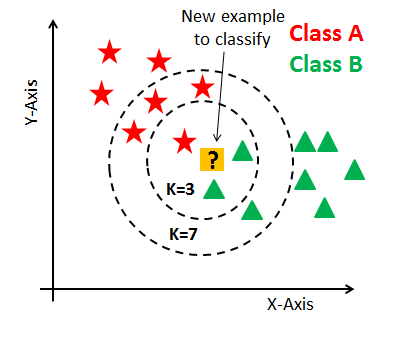

In [44]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knc =  KNeighborsClassifier() # 코드입력

In [47]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
knc_pred = knc.predict(x_valid) # 코드입력

In [49]:
(knc_pred == y_valid).mean()

0.9473684210526315

In [50]:
knc = KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid) # 코드입력

In [51]:
(knc_pred == y_valid).mean()

0.9473684210526315

### 서포트 벡터 머신 (SVC)

* 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

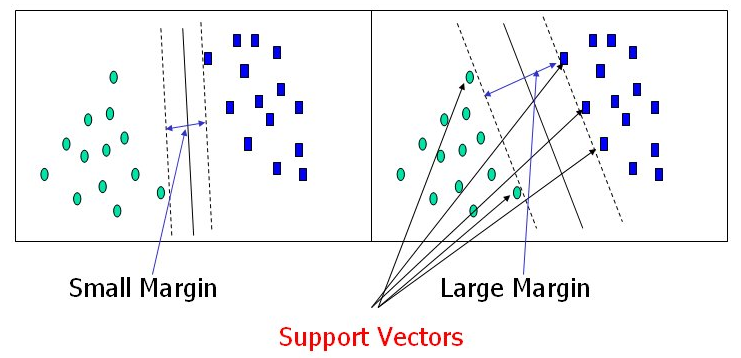

In [52]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

- OvsR 전략 사용

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [53]:
from sklearn.svm import SVC

In [54]:
# 코드입력
svc = SVC(random_state=0,)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [55]:
svc

SVC(random_state=0)

In [56]:
(svc_pred == y_valid).mean()

0.9473684210526315

In [57]:
svc_pred[:5]

array([0, 2, 1, 1, 2])

각 클래스 별 확률값을 return 해주는 `decision_function()`

In [58]:
svc.decision_function(x_valid)[:5] # 코드입력

array([[ 2.23141272,  1.1569539 , -0.25321253],
       [-0.23467787,  0.91373994,  2.24391724],
       [-0.21566175,  2.23524618,  0.87957818],
       [-0.20851959,  2.24221865,  0.83436069],
       [-0.20874217,  0.79917879,  2.25379612]])

### 의사 결정 나무 (Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

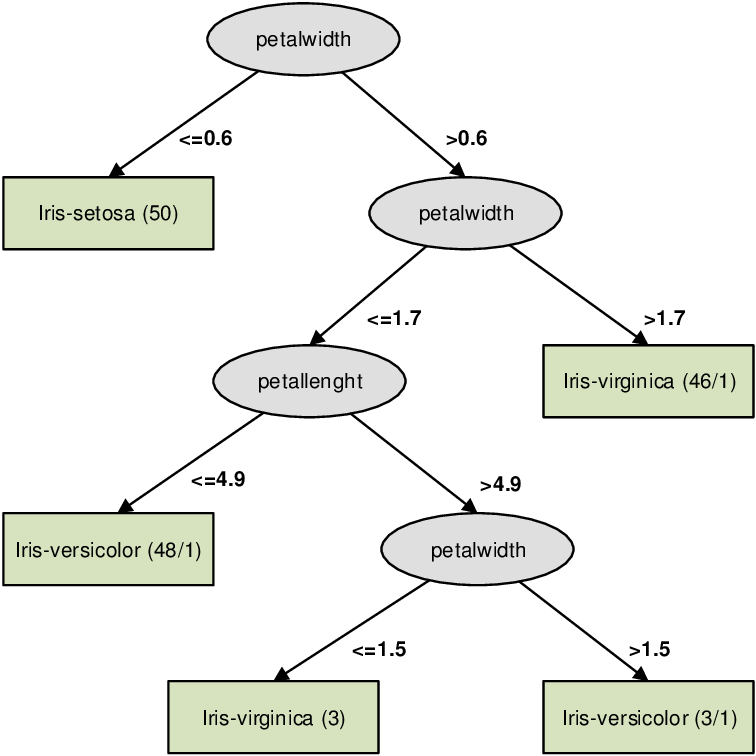

In [59]:
Image('C:/Users/user/Desktop/대구AI스쿨/Project/AI/DataAnalysis/FastCampus/sample/Decision-tree-for-Iris-dataset.png', width=500)

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier(random_state=0) # 코드입력

In [62]:
dtc.fit(x_train, y_train) # 코드입력

DecisionTreeClassifier(random_state=0)

In [63]:
dtc_pred = dtc.predict(x_valid)

In [64]:
(dtc_pred == y_valid).mean()

0.9473684210526315

In [65]:
from sklearn.tree import export_graphviz
from subprocess import call

In [66]:
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

In [67]:
graph_tree(dtc) # 코드입력

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

gini계수: 불순도를 의미하며, 계수가 높을 수록 엔트로피가 크다는 의미하며

엔트로피가 크다는 의미는 쉽게 말해서, 클래스가 혼잡하게 섞여 있다는 뜻입니다.

In [68]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

In [69]:
graph_tree(dtc)

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

## 오차 (Error)

In [ ]:
# 코드입력

### 정확도의 함정

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

유방암 환자 데이터셋을 로드합니다.

**target**: 0: 악성종양, 1:양성종양

In [ ]:
cancer = # 코드입력

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

데이터 프레임을 생성합니다.

In [ ]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [ ]:
df.head()

mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]

In [ ]:
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

In [ ]:
pos

mean radius  mean texture  ...  worst fractal dimension  target
19        13.540         14.36  ...                  0.07259       1
20        13.080         15.71  ...                  0.08183       1
21         9.504         12.44  ...                  0.07773       1
37        13.030         18.42  ...                  0.06169       1
46         8.196         16.84  ...                  0.07409       1
..           ...           ...  ...                      ...     ...
558       14.590         22.68  ...                  0.08004       1
559       11.510         23.93  ...                  0.08732       1
560       14.050         27.15  ...                  0.08321       1
561       11.200         29.37  ...                  0.05905       1
568        7.760         24.54  ...                  0.07039       1

[357 rows x 31 columns]

양성 환자 **357개** + 악성 환자 **5개**

In [ ]:
sample = # 코드입력

In [ ]:
x_train, x_test, y_train, y_test = # 코드입력

모델을 정의하고, 학습합니다.

In [ ]:
model = # 코드입력
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
(pred == y_test).mean()

0.978021978021978

In [ ]:
my_prediction = np.ones(shape=y_test.shape)

In [ ]:
(my_prediction == y_test).mean()

0.989010989010989

정확도만 놓고 본다면, 제가 만든 무조건 음성 환자로 예측하는 분류기가 성능이 좋습니다

하지만, 의사가 과연 **무조건 음성 환자로 예측해서 예측율 98.9% 로 말하는 의사**는 자질이 좋은 의사일까요?

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 **위와 같은 오류**에 빠질 수 있습니다.

이를 보완하고 생겨난 지표들이 있습니다. 차차 알아보겠습니다.

### 오차 행렬 (confusion maxtix)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# 코드입력

array([[ 1,  0],
       [ 2, 88]])

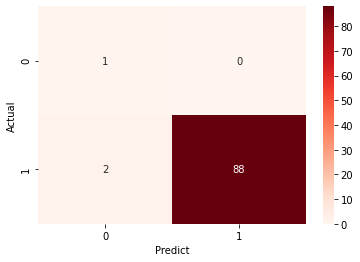

In [ ]:
sns.# 코드입력
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

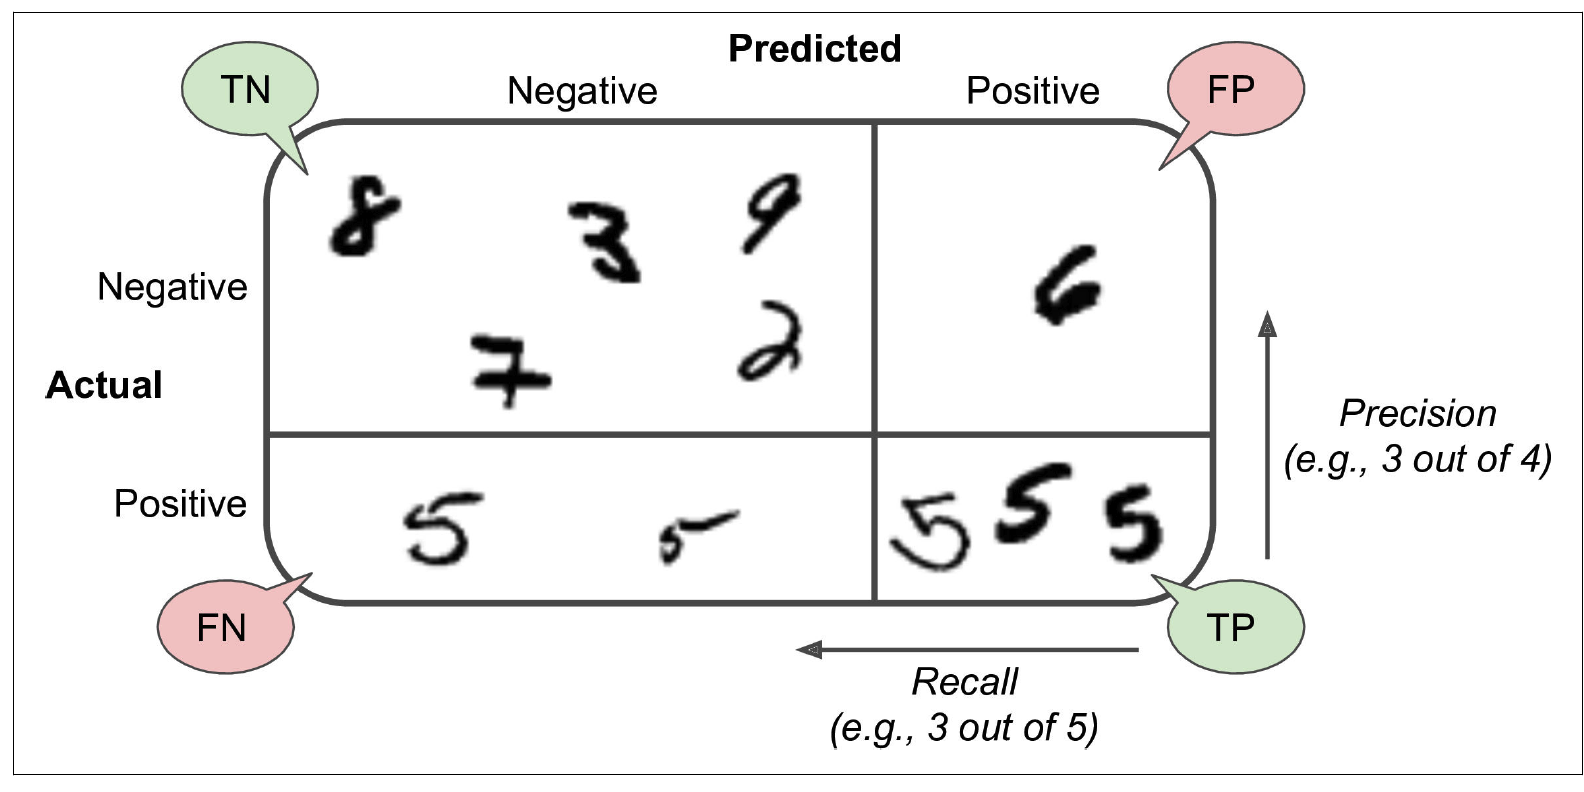

In [ ]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=500)

In [ ]:
from sklearn.metrics import precision_score, recall_score

### 정밀도 (precision)

양성 예측 정확도

TP / (TP + FP)

In [ ]:
# 코드입력

1.0

무조건 **양성**으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않습니다.

### 재현율 (recall)

TP / (TP + FN)

정확하게 감지한 **양성 샘플의 비율**입니다.

민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 불리웁니다.

In [ ]:
# 코드입력

0.9777777777777777

In [ ]:
88/90

0.9777777777777777

### f1 score

정밀도와 재현율의 **조화 평균**을 나타내는 지표입니다.

In [ ]:
Image('https://miro.medium.com/max/918/1*jCu9fNZS0hSRHVJ2cBTegg.png')

<IPython.core.display.Image object>

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# 코드입력

0.9887640449438202